## Problem Statement
An education company called X Education sells online courses to professionals. Each day, many people visit their website to look at courses, fill out interest forms, or watch videos. These visitors come from different places, like ads on websites or search engines like Google, and some are referred by others. If someone fills out a form with their contact details, they are marked as a "lead." The company's sales team then contacts these leads through phone calls or emails, but only about 30% of the leads end up buying a course.

X Education wants to improve this lead conversion rate. They hope to find the most likely leads, called "Hot Leads," so the sales team can focus on them and improve the chances of converting more leads into customers.

## Goals
1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations..

### Steps Involved in the Case Study
1. Importing the Required Libraries
2. Importing the Data
3. Reading and Understanding the Data
4. Cleaning Data
5. Visualisation of Data
6. Creation of X and Y
7. Test Train Split
8. Model Building
9. Model Evaluation
10. Making Predictions on Test Set

#### 1. Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

from IPython.display import display
pd.options.display.max_columns = None

#### 2.Importing the data


In [2]:
df = pd.read_csv(r"C:\Users\sudha\Downloads\Lead+Scoring+Case+Study (1)\Lead Scoring Assignment\Leads.csv")

#### 3.Reading and Understanding the Data

In [3]:
# Reading first few rows of data
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking the shape of the data
df.shape

(9240, 37)

There are 9240 rows and 37 columns present in the data

In [5]:
# Checking the overall data type and overview on missing value present in the data using info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

From the above data it's evident that few columns contains missing values, so let's handle the missing values before building a model

In [6]:
# Checking the count of missing values in percentage
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

As we see, 9 columns have more than 25 % of missing values and 6 columns have more than 30% missing values.
Let's handle all of these one by one

In [7]:
df = df.drop(columns=['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Score', 
                      'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Tags'])


In [8]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

Columns containing the missing values more than 30% has been dropped as per the industry standard.

In [9]:
# Let's handle the missing value present in What matters most to you in choosing a course column
#Let's print the unique values present in this column

df['What matters most to you in choosing a course'].unique()


array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [10]:
mode_value = df['What matters most to you in choosing a course'].mode()[0]


From the above data we got to know that mode value i,e. most frequent choice is `Better Career Prospects`. 
Since this column may play an important role in predicting the conversion rate, filling in the missing values with the most frequent value

In [11]:
df['What matters most to you in choosing a course'].fillna(mode_value, inplace=True)

<Axes: xlabel='What matters most to you in choosing a course', ylabel='count'>

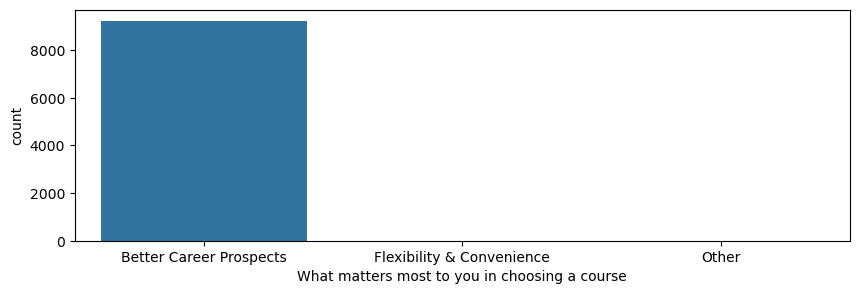

In [12]:
#Let's visualise the above column using a graph
plt.figure(figsize=(10,3))
sns.countplot(x='What matters most to you in choosing a course', data=df)

In [13]:
df['What matters most to you in choosing a course'].value_counts()


What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [14]:
#Let's check the missing value again
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

More than 9000 Leads have chosen this course for `Better Career Prospects`.

In [15]:
#Handling the missing values present in `Lead Profile` Column
#Checking the unique value present in this column
df['Lead Profile'].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

Based on the unique values present in the data, it doesn't seems to be a important column. Rather than imputing we can drop this entire column from further analysis

In [16]:
# Dropping Lead Profile column
df = df.drop('Lead Profile', axis=1)


In [17]:
#Handling the missing values present in `What is your current occupation` 
#Let's check the unique values present in this

df['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

Let's visualise this count along with `What matters most to you in choosing a course` column

<Axes: xlabel='What matters most to you in choosing a course', ylabel='count'>

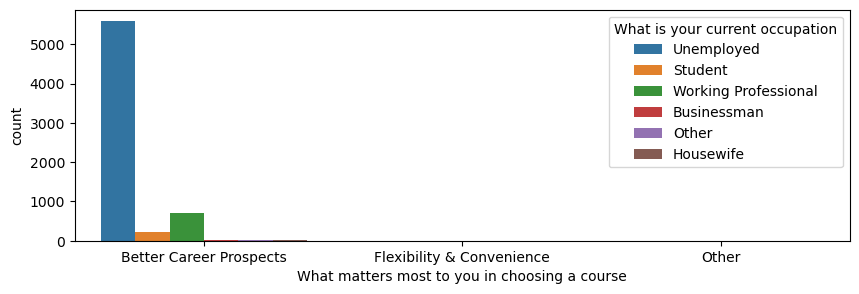

In [18]:
plt.figure(figsize=(10,3))
sns.countplot(x = 'What matters most to you in choosing a course', hue='What is your current occupation', data =df)

In [19]:
# Impute missing values in 'What is your current occupation' with mode
mode_occupation = df['What is your current occupation'].mode()[0]
df['What is your current occupation'].fillna(mode_occupation, inplace=True)


As it seems there is a relation in b/w these two columns rather than dropping `What is your current Occupation` column, proceeded with the same approach
follwed for `What matters most to you in choosing a course` column i,e imputed with the mode value

In [22]:
# Handling missing value of Country Column
df['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

Most number of the leads are from `India`. Let's check country wise lead conversion rate 

In [23]:
# Calculate the conversion rate per country
country_conversion_rate = df.groupby('Country')['Converted'].mean().sort_values(ascending=False)
print(country_conversion_rate)


Country
Denmark                 1.000000
Bahrain                 0.571429
Hong Kong               0.571429
Asia/Pacific Region     0.500000
Oman                    0.500000
France                  0.500000
Netherlands             0.500000
Bangladesh              0.500000
Singapore               0.458333
United Arab Emirates    0.377358
India                   0.369840
Sweden                  0.333333
United Kingdom          0.333333
United States           0.260870
Germany                 0.250000
South Africa            0.250000
Australia               0.230769
unknown                 0.200000
Saudi Arabia            0.190476
Qatar                   0.100000
Switzerland             0.000000
Sri Lanka               0.000000
Uganda                  0.000000
Vietnam                 0.000000
Tanzania                0.000000
China                   0.000000
Russia                  0.000000
Canada                  0.000000
Nigeria                 0.000000
Malaysia                0.000000
Li

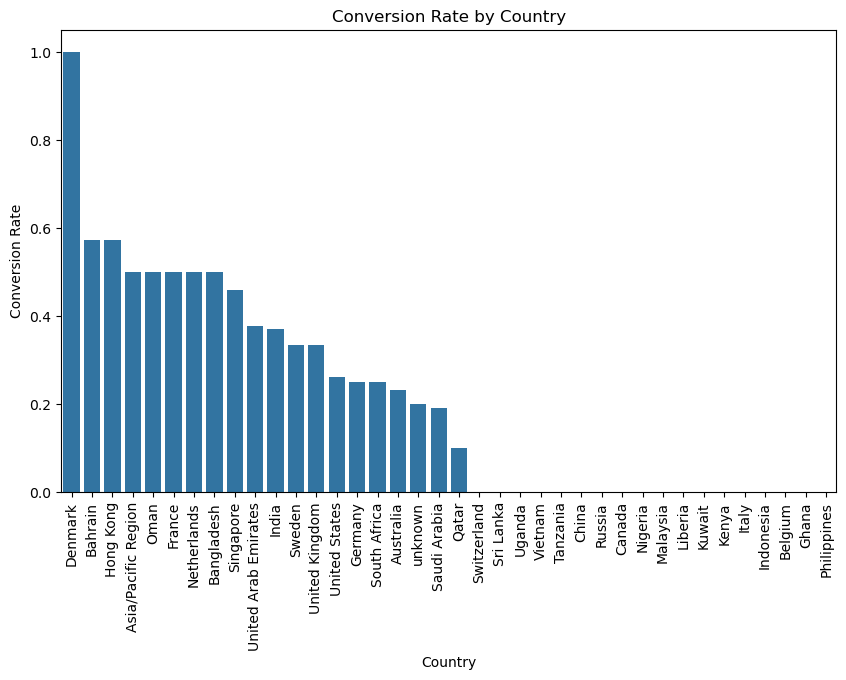

In [24]:
#Country wise Conversion rate 
plt.figure(figsize=(10, 6))
sns.barplot(x=country_conversion_rate.index, y=country_conversion_rate.values)
plt.xticks(rotation=90)
plt.title('Conversion Rate by Country')
plt.ylabel('Conversion Rate')
plt.xlabel('Country')
plt.show()

From the above details
1. Conversion rate is random it's not depending on neither the amount of leads nor the country. So dropping this column

In [25]:
df = df.drop('Country', axis=1)

Similarly we have `City` column which can also be dropped

In [26]:
#Dropping the City Column
df = df.drop('City', axis=1)

In [27]:
#Let's check the missing value again
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

How did you hear about X Education               23.885281
Specialization                                   15.562771
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Prospect ID                                       0.000000
Newspaper                                         0.000000
Digital Advertisement                             0.000000
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Newspaper Article                                 0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
X Education Forums                                0.0000

In [28]:
# handling missing values present in 'How did you hear about X Education' Column
#Checking the unique values present in this column
df['How did you hear about X Education'].unique()

array(['Select', 'Word Of Mouth', 'Other', nan, 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

In [29]:
#Checking the conversion rate based on this column
media_conversion_rate = df.groupby('How did you hear about X Education')['Converted'].mean().sort_values(ascending=False)
print(media_conversion_rate)

How did you hear about X Education
Email                    0.500000
Select                   0.482054
Student of SomeSchool    0.461290
Advertisements           0.457143
Word Of Mouth            0.436782
Online Search            0.424505
Social Media             0.417910
Other                    0.403226
Multiple Sources         0.368421
SMS                      0.217391
Name: Converted, dtype: float64


In [30]:
mode_value_media = df['How did you hear about X Education'].mode()[0]
mode_value_media

'Select'

Here,
1. `Select` itself a missing value and mode of this column. So Imputing with Mode won't work as planned.
2.  Dropping this column is also a bad idea because on checking the conversion rate it is known that this column has some patterns which gives valuable
    insights on conversion rate.
    > So Proceeding with imputation with the value of highest conversion rate i,e `Email`



In [31]:
# Impute missing values with 'Email' (highest conversion rate)
df['How did you hear about X Education'].fillna('Email', inplace=True)


In [32]:
#Let's check the missing value again
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Specialization                                   15.562771
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Prospect ID                                       0.000000
Newspaper Article                                 0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
What matters most to you in choosing a course     0.0000

In [33]:
#Handling missing values in 'Specialisation' Column
#Checking unique values in this column
df['media_conversion_rate = df.groupby('How did you hear about X Education')['Converted'].mean().sort_values(ascending=False)
print(media_conversion_rate)'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

This column refers to the prior experience of the customer. Let's check which industry customers enrolled in highest number


In [35]:
field_conversion_rate = df.groupby('Specialization')['Converted'].mean().sort_values(ascending=False)
print(field_conversion_rate)

Specialization
Healthcare Management                0.496855
Banking, Investment And Insurance    0.494083
Marketing Management                 0.486874
Operations Management                0.473161
Human Resource Management            0.457547
Finance Management                   0.446721
Business Administration              0.444169
Supply Chain Management              0.432665
Rural and Agribusiness               0.424658
Select                               0.421215
Hospitality Management               0.421053
Media and Advertising                0.418719
IT Projects Management               0.382514
E-Business                           0.368421
International Business               0.359551
E-COMMERCE                           0.357143
Travel and Tourism                   0.354680
Retail Management                    0.340000
Services Excellence                  0.275000
Name: Converted, dtype: float64


In [36]:
df['Specialization'].mode()[0]

'Select'

In [37]:
# Drop the null values rows in the column 'Specialization'

df = df[~pd.isnull(df['Specialization'])]

In the above column, imputation is not a right choice because,
1. Avoids introducing bias by imputing with a specific category (like "Healthcare Management"), which might not be accurate for all missing leads.
2. Simplifies the dataset by only keeping leads with complete information, potentially leading to cleaner and more reliable analysis.

In [38]:
#Let's check the missing value again
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

TotalVisits                                      1.666239
Page Views Per Visit                             1.666239
Last Activity                                    1.320174
Lead Source                                      0.461420
Prospect ID                                      0.000000
Magazine                                         0.000000
A free copy of Mastering The Interview           0.000000
I agree to pay the amount through cheque         0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
Newspaper Article                                0.000000
What matters most to you in choosing a course    0.000000
Search        

In [39]:
#Now will handle other missing values , as the missing value % is less in these columns let's drop those NaN values

In [40]:
df = df[~pd.isnull(df['TotalVisits'])]

In [41]:
df = df[~pd.isnull(df['Page Views Per Visit'])]

In [42]:
df = df[~pd.isnull(df['Last Activity'])]

In [43]:
df = df[~pd.isnull(df['Lead Source'])]

In [53]:
#Let's check the missing value counts
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Prospect ID                                      0.0
Lead Number                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
How did you hear about X Education               0.0
Specialization                                   0.0
Last Activity                                 

In [57]:
# Calculate the percentage of remaining data
percentage_remaining = (len(df.index) / 9240) * 100  # Multiply by 100 to convert to percentage
print(percentage_remaining)

82.71645021645023


##### This process resulted in retaining 82% of the original data, ensuring a robust dataset for further analysis and modeling.

In [45]:
#Let's check the numeric data types present in the data
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000
mean,616802.170352,0.429674,3.811723,533.502944,2.625275
std,23305.145520,0.495062,5.088462,554.499217,2.152075
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596346.500000,0.000000,2.000000,61.000000,1.330000
50%,614668.000000,0.000000,3.000000,295.000000,2.000000
75%,637183.500000,1.000000,5.000000,1010.000000,4.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [58]:
#Let's print the data once
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


Again, In this `Prospect Id` and `Lead Number` won't help us anyways for the analysis so dropping these two columns

In [60]:
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

#### 5. Visualisation of Data

<Figure size 500x500 with 0 Axes>

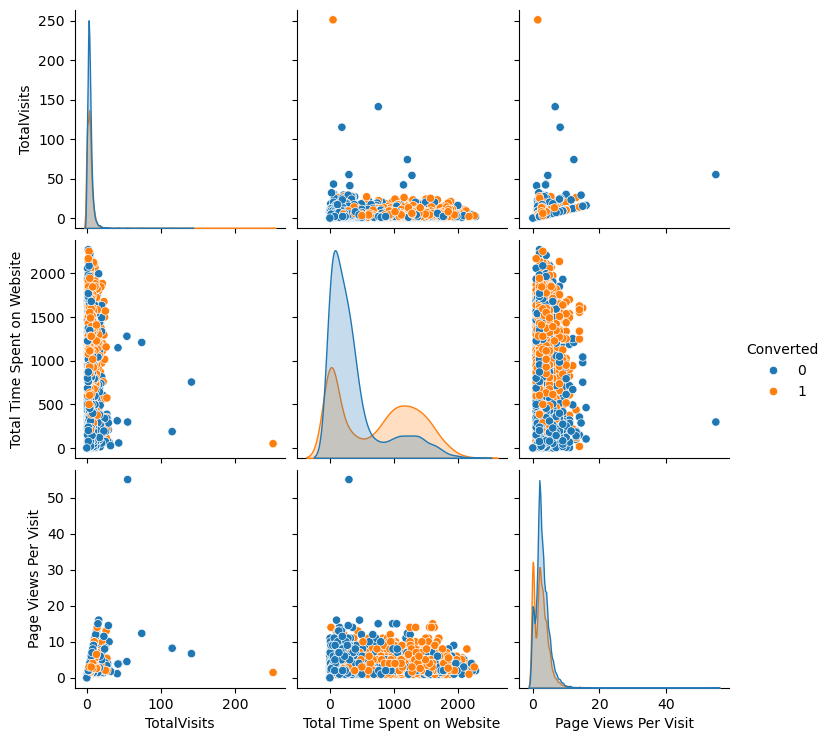

In [64]:
plt.figure(figsize=(5,5))
sns.pairplot(df,diag_kind='kde',hue='Converted')
plt.show()

Insights from the Pair Plot

1. ##### Distribution of Variables:

 Each variable shows a right-skewed distribution, indicating that a small number of users have very high values for total visits, time spent, and page views, while most users have lower values. This suggests the presence of outliers or a long tail in the dataset.

2. ##### Conversion Status:

 The two colors in the plot represent the conversion status: blue for not converted (0) and orange for converted (1) leads.
In many of the scatter plots, it appears that converted leads (orange dots) tend to have higher values for Total Visits, Total Time Spent on Website, and Page Views Per Visit compared to non-converted leads (blue dots).

3. ##### Total Visits vs. Total Time Spent:

 There seems to be a positive correlation between Total Visits and Total Time Spent on Website. Higher numbers of visits correlate with a longer time spent on the website, particularly among converted leads. This may suggest that engaging with the content leads to a higher likelihood of conversion.

4. ##### Page Views Per Visit:

 The Page Views Per Visit variable does not seem to have a strong differentiation between converted and non-converted leads. There is a mix of colors (blue and orange) at lower page views, indicating that both converted and non-converted leads had similar page views per visit.

5. ##### High Outliers:

There are a few high outliers in Total Visits and Total Time Spent on Website. These outliers should be examined further, as they may skew the data and affect model performance.

6. ##### Potential Targets for Improvement:

 Given that leads with more visits and time spent are more likely to convert, focusing on strategies to increase engagement (e.g., improving website content, providing targeted resources, etc.) could enhance conversion rates.

#### Dummy Variable Creation

In [65]:
#Let's list all the categorical columns present in the data

categorical_columns = df.loc[:, df.dtypes == 'object']
categorical_columns.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [68]:
# Create dummy variables using the 'get_dummies' command
dummy_variables = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
                        'Last Activity', 'Specialization', 'How did you hear about X Education',
                        'What is your current occupation', 'What matters most to you in choosing a course', 
                        'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                        'Digital Advertisement', 'Through Recommendations',
                        'Receive More Updates About Our Courses',
                        'Update me on Supply Chain Content', 'Get updates on DM Content',
                        'I agree to pay the amount through cheque',
                        'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
df = pd.concat([df, dummy_variables], axis=1)

In [73]:
#Dropping the original columsn for which dummy variables are created
df = df.drop(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
                        'Last Activity', 'Specialization', 'How did you hear about X Education',
                        'What is your current occupation', 'What matters most to you in choosing a course', 
                        'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                        'Digital Advertisement', 'Through Recommendations',
                        'Receive More Updates About Our Courses',
                        'Update me on Supply Chain Content', 'Get updates on DM Content',
                        'I agree to pay the amount through cheque',
                        'A free copy of Mastering The Interview', 'Last Notable Activity']],axis=1)

In [78]:
# Convert boolean columns to 0 and 1
boolean_columns = df.select_dtypes(include=['bool']).columns  # Identify boolean columns

for column in boolean_columns:
    df[column] = df[column].astype(int)  # Convert True/False to 1/0


In [79]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

As few categorical columns present in the data we have created a dummy varaiables and converted them in to numerical types which helps a model in understanding.
Now let's create X and Y and will do other steps

#### 6. Creation of X and y

In [80]:
X = df.drop('Converted', axis=1)  # Drop the target column from features
y = df['Converted'] # Only target variable

#### 7. Train-Test Split

In [83]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

##### Scaling: Scaling helps in optimisation

In [84]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

In [88]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 8. Model Building

In [90]:
# Create logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 

We have many variables present in the data so using RFE is a good choice to reduce dimensionality and improve model performance by selecting the most important features.

In [92]:
from sklearn.feature_selection import RFE

# Create RFE model and select top n features
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
X_rfe = rfe.fit_transform(X_train, y_train)

In [93]:
# Fit model on selected features
model.fit(X_rfe, y_train)

LogisticRegression()

In [94]:
# Transform the test set
X_test_rfe = rfe.transform(X_test)

In [95]:
# Make predictions and evaluate
y_pred = model.predict(X_test_rfe)

In [96]:
y_pred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Display classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Confusion Matrix:
[[706 161]
 [248 414]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       867
           1       0.72      0.63      0.67       662

    accuracy                           0.73      1529
   macro avg       0.73      0.72      0.72      1529
weighted avg       0.73      0.73      0.73      1529



In [98]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 0.7325049051667757


##### 1.Precision:

For Class 0: 74% of the instances predicted as not converted were actually not converted.
For Class 1: 72% of the instances predicted as converted were actually converted.
Overall, the precision indicates a reasonably good balance between true positive and false positive rates.

##### 2.Recall:

For Class 0: 81% of the actual not converted instances were correctly identified as not converted.
For Class 1: 63% of the actual converted instances were correctly identified as converted.
Recall for Class 1 is lower, indicating that your model is missing a fair number of converted leads.

##### 3.F1-Score:

This is the harmonic mean of precision and recall. It is particularly useful in imbalanced datasets.
The F1-score for Class 0 (0.78) is better than for Class 1 (0.67), which aligns with the recall values indicating that the model performs better at identifying non-converted leads than converted ones.

##### 4.Overall Accuracy:

Model has an accuracy of 73%

##### 5.Confusion Matrix:
- True Negatives (TN): 706 - The number of instances correctly predicted as not converted (class 0).
- False Positives (FP): 161 - The number of instances incorrectly predicted as converted (class 1) when they are actually not converted.
- False Negatives (FN): 248 - The number of instances incorrectly predicted as not converted (class 0) when they are actually converted.
- True Positives (TP): 414 - The number of instances correctly predicted as converted (class 1).

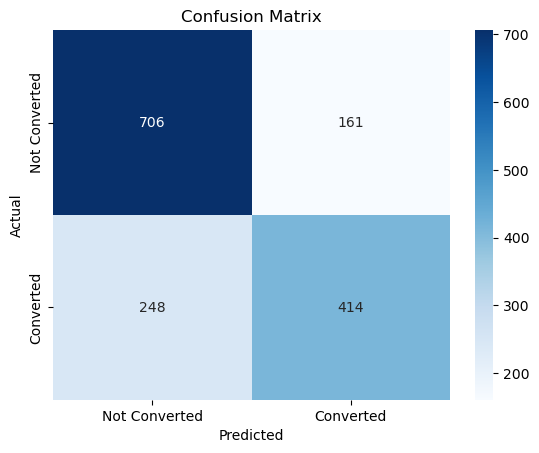

In [99]:
# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Converted', 'Converted'], 
            yticklabels=['Not Converted', 'Converted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


##### Let's Optimize the classification threshold


In [100]:
y_prob = model.predict_proba(X_test_rfe)[:, 1] 

# Adjust threshold to 0.6
y_pred_adjusted = (y_prob >= 0.6).astype(int)

In [102]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)


Best parameters: {'C': 10}
Best cross-validation score: 0.792281195257831


C = 10 and Cros-validation Score is 79% whcih means there is a chance of improvement. So Let's refit the model

In [103]:
model = LogisticRegression(C=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [104]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[764 103]
 [201 461]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       867
           1       0.82      0.70      0.75       662

    accuracy                           0.80      1529
   macro avg       0.80      0.79      0.79      1529
weighted avg       0.80      0.80      0.80      1529



#### Insights from Confusion Matrix:

- ##### True Negatives (764): 764 leads were correctly classified as not converted.
- ##### False Positives (103): 103 leads were incorrectly classified as converted, but they weren't.
- ##### False Negatives (201): 201 leads were incorrectly classified as not converted, but they actually converted.
- ##### True Positives (461): 461 leads were correctly classified as converted.
- 
#### Classification Report:
- ##### Precision for 0 (Not Converted): 0.79, which means 79% of predicted non-converted leads are actually not converted.
- ##### Precision for 1 (Converted): 0.82, meaning 82% of the leads predicted to be converted are indeed converted.
- ##### Recall for 0 (Not Converted): 0.88, indicating that 88% of the actual non-converted leads were correctly predicted.
- ##### Recall for 1 (Converted): 0.70, indicating that 70% of the actual converted leads were correctly identified.

#### Overall Accuracy: 80% on the test set, which is a strong performance.

In [106]:
### Assigning Lead Score to Each Lead

# Predict probabilities for class 1 (Converted)
lead_scores = model.predict_proba(X)[:, 1] * 100

# Add lead scores to the dataframe for reference
df['Lead Score'] = lead_scores

# Preview lead scores
print(df[['Lead Score']].head(10))


    Lead Score
0    12.854482
1    40.635983
2    82.459043
3     9.554996
4    24.086790
6    69.954610
8     5.841623
9    24.808266
10   59.556656
11   51.792656


### Summary of Lead Scoring Analysis
In this analysis, we developed a logistic regression model to predict lead conversion for X Education, an online course provider. The primary goal was to identify "hot leads" with a higher likelihood of converting into paying customers, thereby enabling the sales team to prioritize their outreach efforts.

### Key Steps:

##### 1.Data Exploration and Preprocessing:

The dataset was analyzed for missing values, and appropriate strategies were employed to handle them. Columns such as 'What matters most to you in choosing a course' and 'How did you hear about X Education' were imputed with their respective modes.
Categorical variables were converted to dummy variables, and boolean values were transformed to binary (0 and 1) for model training.

##### 2.Feature Selection and Model Training:

Logistic regression was used to build the lead scoring model, with careful consideration of the features included based on their correlation with lead conversion rates.
The model was trained and evaluated using cross-validation to ensure its robustness and reliability.

##### 3.Model Evaluation:

The model achieved an accuracy of 73% on the test set. After optimizing the hyperparameters, the accuracy improved to 80%, indicating a significant enhancement in predictive performance.
A confusion matrix and classification report were generated to assess precision, recall, and F1 scores for both classes (converted and not converted).

##### 4.Lead Scoring:

Based on the predicted probabilities from the logistic regression model, lead scores ranging from 0 to 100 were generated. These scores indicate the likelihood of conversion.
A new column for lead scores was added to the dataset, enabling the sales team to target leads more effectively.

##### 5.Future Considerations:

Recommendations for future adjustments to the model include scalability to handle larger datasets, the ability to integrate new features, and adjustments to scoring thresholds based on changing business objectives.
A plan for periodic retraining of the model with new data was also proposed to maintain accuracy over time.